Project to perform RFM Analysis on sales dataset

Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)

Read in the csv data file and check loaded correctly

In [4]:
df = pd.read_csv("C:\\Users\\alexd\\Python Projects\\k_means/online_retail_II_p1.csv", encoding='ISO-8859-1')
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 7:45,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 7:45,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 7:45,1.25,13085.00,United Kingdom


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,525461.00,525461.00,417534.00
mean,10.34,4.69,15360.65
std,107.42,146.13,1680.81
min,-9600.00,-53594.36,12346.00
25%,1.00,1.25,13983.00
50%,3.00,2.10,15311.00
75%,10.00,4.21,16799.00
max,19152.00,25111.09,18287.00


problems observed above - Qty and Price both have neg mins - check these
number of customer ids is many less than the qty/price count

In [6]:
df.describe(include='O')

,Invoice,StockCode,Description,InvoiceDate,Country
count,525461,525461,522533,525461,525461
unique,28816,4632,4681,25296,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57,United Kingdom
freq,675,3516,3549,675,485852


problems from above - unique stock codes <> description

In [7]:
# check Customer ID for NaN - this are of no value and will be dropped
df[df['Customer ID'].isna()].head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32,1.65,NaN,United Kingdom


In [8]:
# Check for neg Qty - 'C' means that the order was cancelled or returned - these will be excluded
df[df['Quantity'] < 0].head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44,4.25,17592.00,United Kingdom


In [9]:
# Cast the Invoice column to string and check for other alpha leaders
# Use REGEX to find the leaders ^ and $ as anchors //d for digits
df['Invoice'] = df['Invoice'].astype("str")
df[df['Invoice'].str.match("^\\d{6}$") == False]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43,12.75,15329.00,United Kingdom


In [10]:
# Find how what alpha leaders there are. Use REGEX to scrub off numbers and show unique what's left
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
# We know 'C' is cancel, check what 'A' denotes
# A denote bad debt so both C and A will be dropped
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04,-38925.87,NaN,United Kingdom


In [12]:
# Check the StockCodes for interesting things
# Cast StockCode as string to start
# Use REGEX to find anomalies to the StockCode that should be 5 digits
df['StockCode'] = df['StockCode'].astype('str')
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

There's pile of non-conforming StockCodes. Each has to be investigated.
The code line below is the iterative process of keep/drop

In [13]:
df[df["StockCode"].str.contains("DOT")]
# DOT is of no value and would be dropped
# after going through the list only PADS is going to be kept, the rest dropped

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31,822.94,NaN,United Kingdom


In [14]:
df[df["StockCode"].str.contains("PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30,0.00,12671.00,Germany


# Now to clean up the data

In [15]:
cleaned_df = df.copy()


Clean up the Invoice column

In [16]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True   
)
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 7:45,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 7:45,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 7:45,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01,3.75,17530.00,United Kingdom


Clean the StockCode column
Three matches to keep 1. 5 digit stock codes 2. 5 digit stock codes with alpha follower 3. StockCode = PADS

In [17]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 7:45,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 7:45,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 7:45,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01,3.75,17530.00,United Kingdom


# Drop the lines w/ Customer ID = NaN
after dropping the Customer ID NaNs the counts should line up Price/Qty/Customer ID

In [18]:
cleaned_df.dropna(subset=['Customer ID'], inplace=True)
cleaned_df.describe()

,Quantity,Price,Customer ID
count,406337.00,406337.00,406337.00
mean,13.62,2.99,15373.63
std,97.00,4.29,1677.37
min,1.00,0.00,12346.00
25%,2.00,1.25,14004.00
50%,5.00,1.95,15326.00
75%,12.00,3.75,16814.00
max,19152.00,295.00,18287.00


In [19]:
# Clean up Price where price = 0
# How many 0 entries - 28
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [20]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]
len(cleaned_df[cleaned_df["Price"] == 0])  ## 0 entries w/ price = 0

0

How much data left/lost in data cleanup
77% is left so 23% of data lost during cleanup

In [21]:
len(cleaned_df) / len(df)

0.7732429238325965

# Aggregate the data into our RFM features

Extend the Price and Quantity into Sales Total

In [22]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 7:45,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 7:45,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 7:45,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 7:45,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01,3.75,17530.00,United Kingdom,7.50


Create new df for aggregated data

In [23]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency= ("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )
    
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53
1,12347.00,1323.32,2,2010-12-07 14:57
2,12348.00,221.16,1,2010-09-27 14:59
3,12349.00,2221.14,2,2010-10-28 8:23
4,12351.00,300.93,1,2010-11-29 15:23
5,12352.00,343.80,2,2010-11-29 10:07
6,12353.00,317.76,1,2010-10-27 12:44
7,12355.00,488.21,1,2010-05-21 11:59
8,12356.00,3126.25,3,2010-11-24 12:24
9,12357.00,11229.99,1,2010-11-16 10:05


Add Recency by using max date and lastest date of invoice
Set LastInvoiceDate to type datetime

In [24]:
aggregated_df['LastInvoiceDate'] = pd.to_datetime(aggregated_df['LastInvoiceDate'])
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
aggregated_df["Recency"] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


Visualize with histograms and box plots

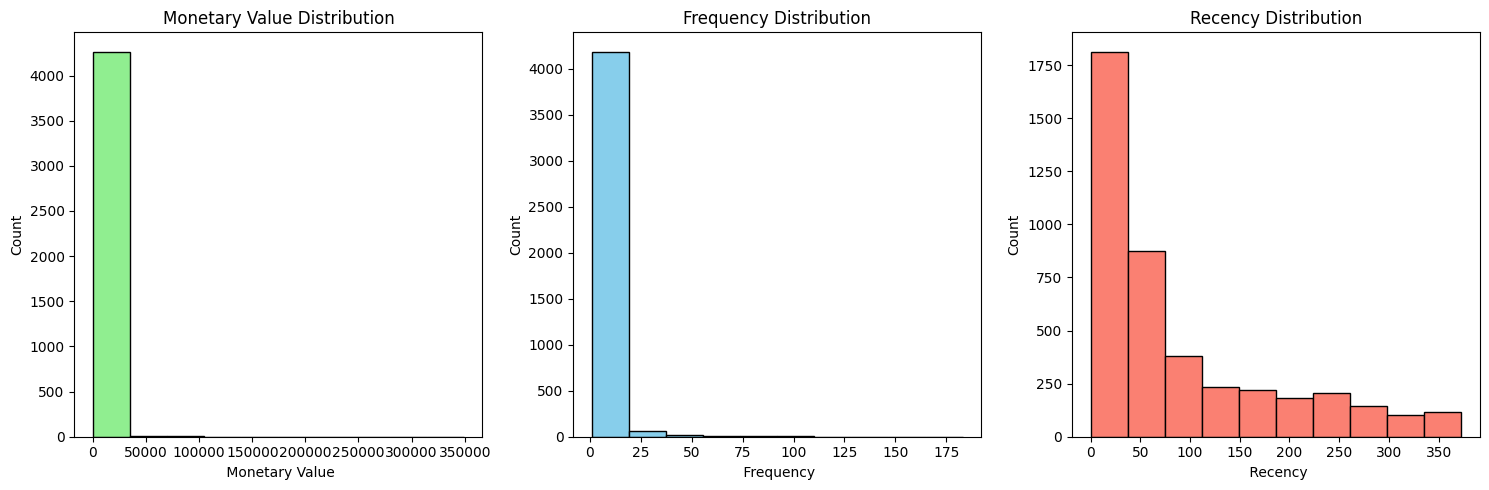

In [25]:
plt.figure(figsize=( 15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel(' Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel(' Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel(' Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()





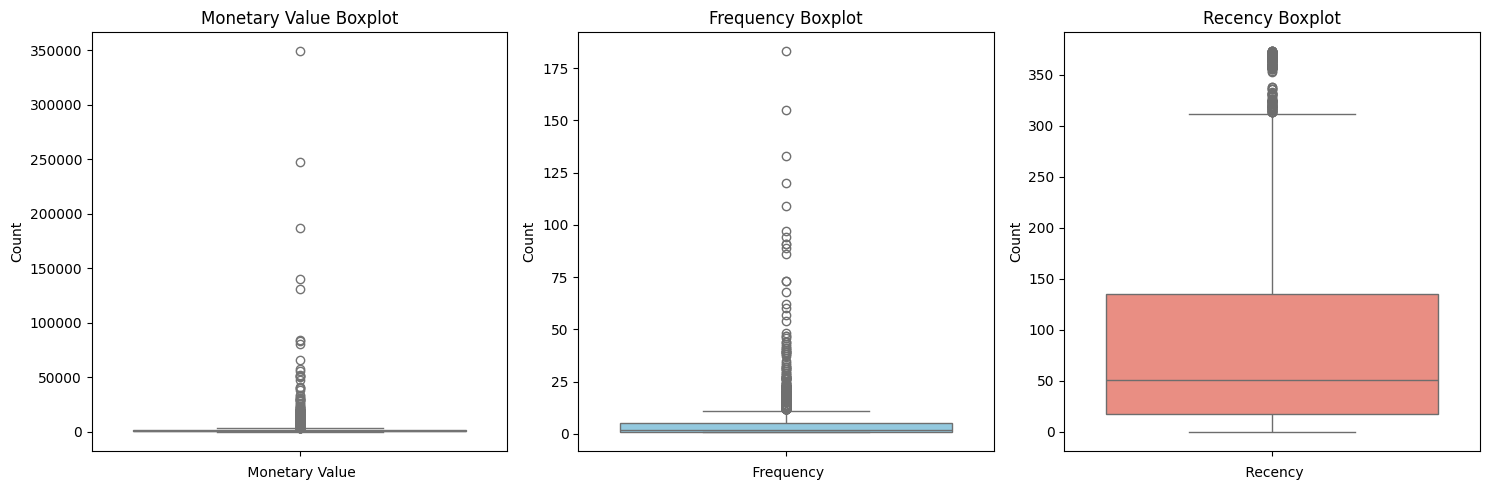

In [26]:
plt.figure(figsize=( 15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='lightgreen')
plt.title('Monetary Value Boxplot')
plt.xlabel(' Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='skyblue')
plt.title('Frequency Boxplot')
plt.xlabel(' Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel(' Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The histogram shows little distribution with so much of the data at the bottom of the plot.
This is confirmed by the boxplot that shows the large number of big outliers in the MV and Freq columns
These outliers are important to the data set so they will be removed but saved to process on their own

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

In [27]:
# Remove the Monetary outliers = 423

M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1
monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) 
                                     | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:24:00.709219840,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [28]:
# Remove the Frequency outliers = 279

F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 -F_Q1
frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) 
                                     | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:03:30.967741952,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:39:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


Now take the outliers out of the aggregated_df
Create a new df and use ~ meaning 'not' from the two outlier df's using their indicies

non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

In [29]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & 
                                (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:43.507482368,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


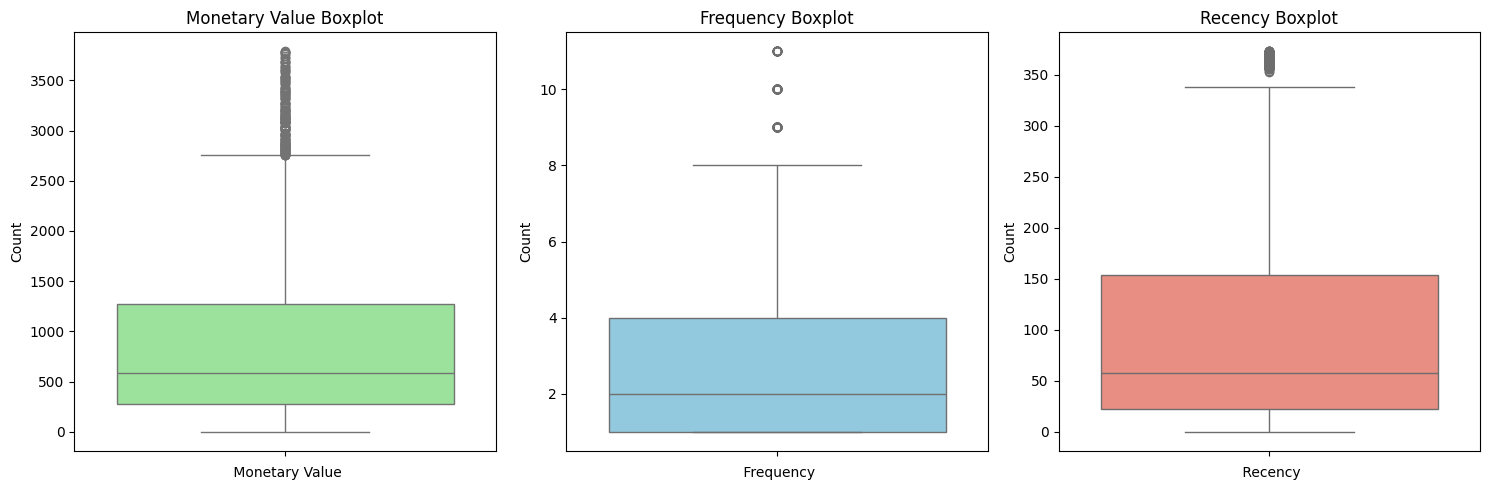

In [30]:
# Redo the boxplots - they do show the difference once the extreme number of outliers are removed

plt.figure(figsize=( 15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='lightgreen')
plt.title('Monetary Value Boxplot')
plt.xlabel(' Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='skyblue')
plt.title('Frequency Boxplot')
plt.xlabel(' Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel(' Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

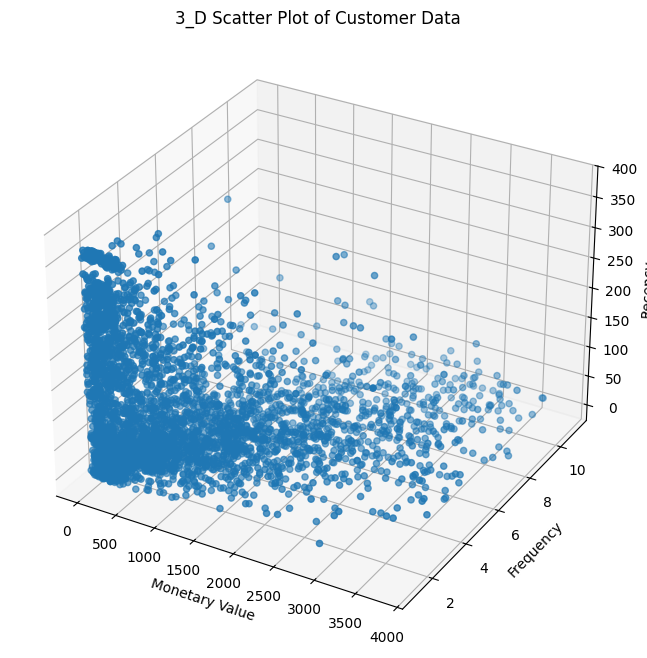

In [31]:
# 3-D Scatterplot of Customer Data

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3_D Scatter Plot of Customer Data')

plt.show()

# Data Scaling
The 3-D plot shows the data distribution but the axes show that the data is on 3 different scales each seperated by an order of magnitude - 10/100/1000
To properly work the data it needs to be scaled so that the each data axis is on a common scale
Standard Scaler forces all data onto a scale to a mean of 0 and a std dev of 1

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [33]:
# scaled_data is returned as a numpy array and it needs to be returned to new df
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index,
                columns=("MonetaryValue", "Frequency", "Recency"))
scaled_data_df


,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


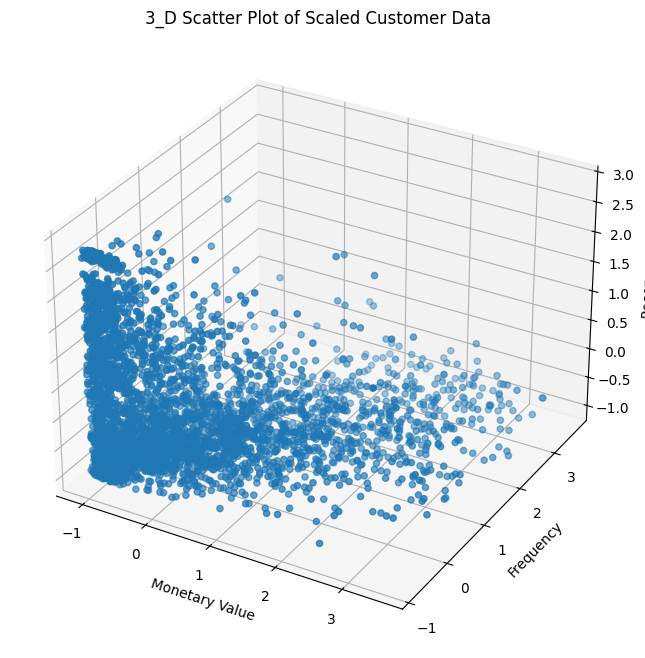

In [34]:
# New 3-D Scatterplot of Scaled Customer Data
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3_D Scatter Plot of Scaled Customer Data')

plt.show()


# KMeans Clustering
First determine the number of clusters by letting the method run on k clusters and capture inertia
Determine the most likely number of clusters using the 'Elbow' method
Confirm choice using silhouette scores

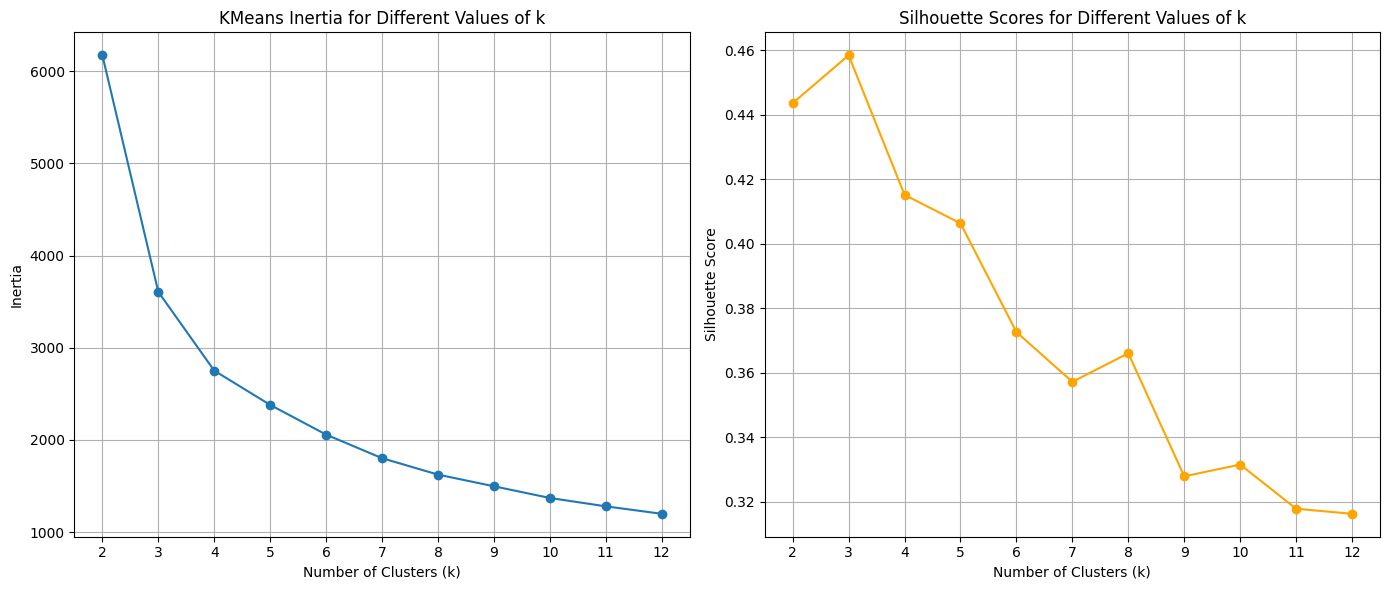

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

max_k =12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1) # work from 2 - 12 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


The KMeans test and the silhouette score suggests that 4 clusters would be the most useful for this data

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

# Add cluster labels to non_outlier_df for plotting

In [37]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


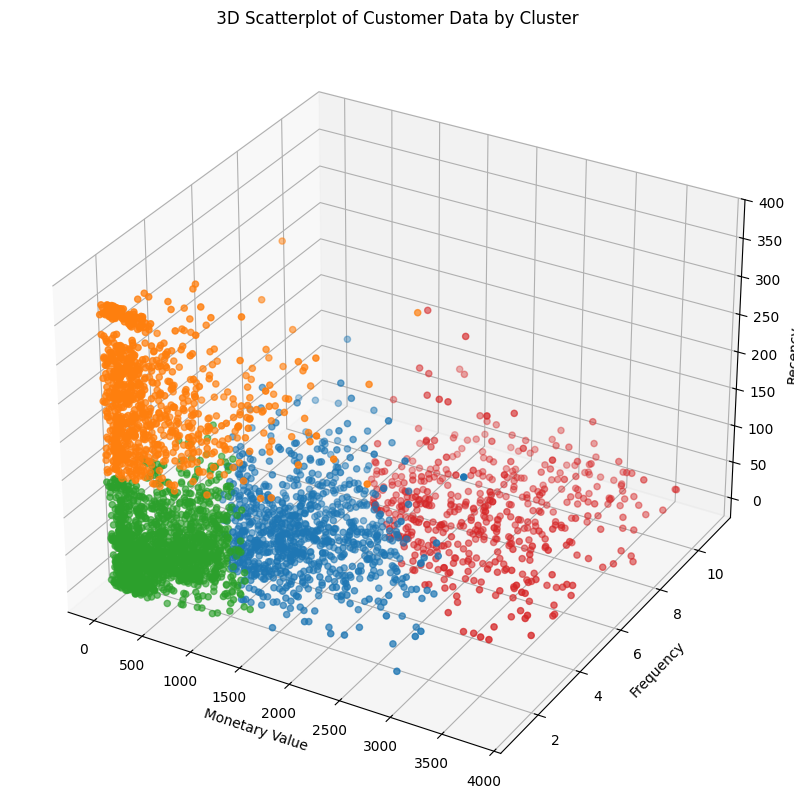

In [38]:
# Plot 3-D of cluster id'd by color map
cluster_colors = {0: '#1f77b4', #Blue
                  1: '#ff7f0e', # Orange
                  2: '#2ca02c', # Green
                  3: '#d62728', # Red
                  }

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title(' 3D Scatterplot of Customer Data by Cluster')

plt.show()

# Create Violin plots of the clusters to determine placing in features
The gray violin plot is the non-scaled data

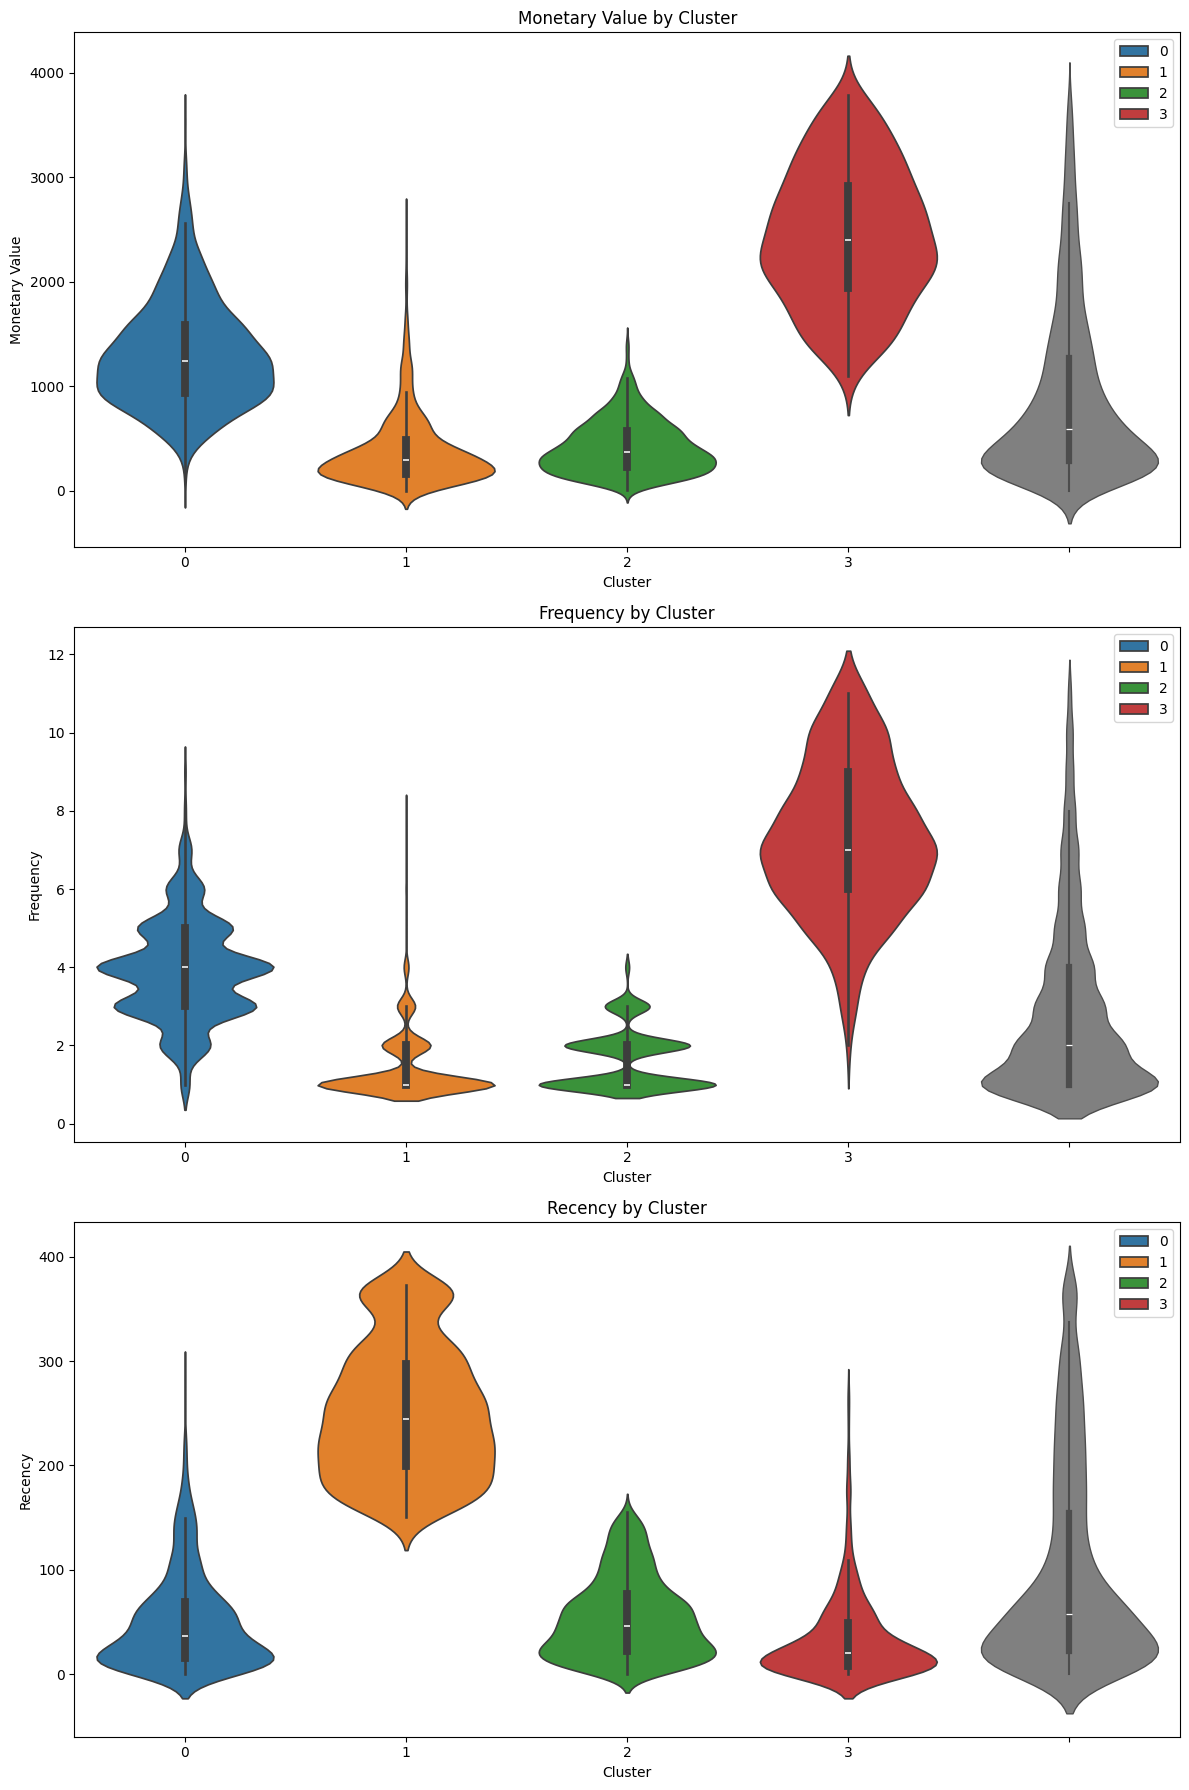

In [39]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, 
             hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, 
             hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, 
             hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()



# Cluster 0 = Blue - high value and buy often - work to retain this cluster
# Cluster 1 = Orange - low value/frequency but recent buyers - work to keep them buying
# Cluster 2 = Green - least active and low value somewhat recent - work to get them back
# Cluster 3 = Red - highest value and frequent buyers but not recent - work to keep them

# Process the outliers from their dfs into one df to visualize their features
Do this by defining a variable that captures all of the overlap indicies using index.intersection 
Next drop the indicies in the variable from the two outlier dfs
Then concatenating the three elements into a new df
Manually assign clusters to each outlier feature

In [42]:
# Isolate the overlap indicies and drop from existing dfs
overlap_indicies = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

frequency_only_outliers = frequency_outliers_df.drop(overlap_indicies)
monetary_only_outliers = monetary_outliers_df.drop(overlap_indicies)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indicies]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, 
                                 monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


# Visualize the features using the assigned clusters and violin plots

Text(0, 0.5, 'Recency')

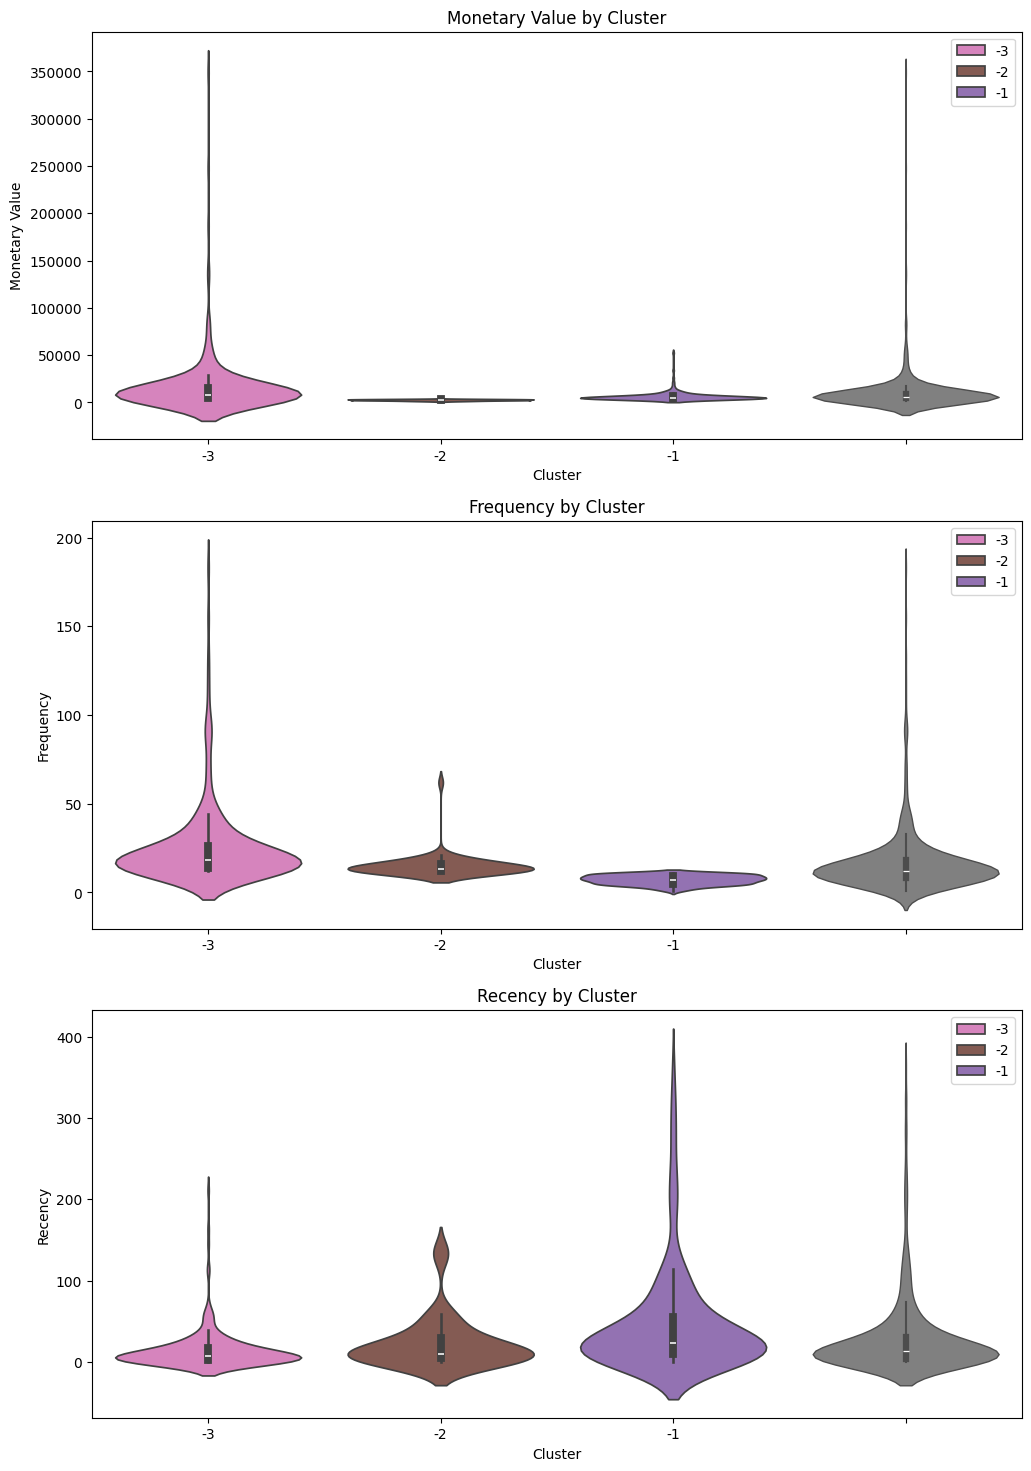

In [44]:
cluster_colors = { -1: '#9467bd',
                  -2: '#8c564b', 
                  -3: '#e377c2'
                  }


plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, 
             hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, 
             hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, 
             hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')


# Cluster -1 Monetary outliers - hi $ but low frequency - work on keeping them and encourage purchases
# Cluster - 2 Frequency outliers - lower $ but more frequent purchases - try to increase value spending
# Cluster -3 Monetary and Frequency outliers - hi $ and hi frequency - develop strategies to keep them engaged

In [58]:
cluster_labels = {
    0: "0-Retain",
    1: "1-Re-engage",
    2: "2-Nurture",
    3: "3-Reward",
    -1: "OM-Pamper",
    -2: "OF-Upsell",
    -3: "OMF-Delight"
}

# Combine both outlier and non_outlier dfs together into a full clustering df

In [59]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [60]:
# create a column and assign cluster_labels by mapping label to cluster
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,1-Re-engage
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,0-Retain
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,2-Nurture
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,0-Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,2-Nurture
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,OMF-Delight
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,OMF-Delight
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,OMF-Delight
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,OMF-Delight


# Visualize the complete data

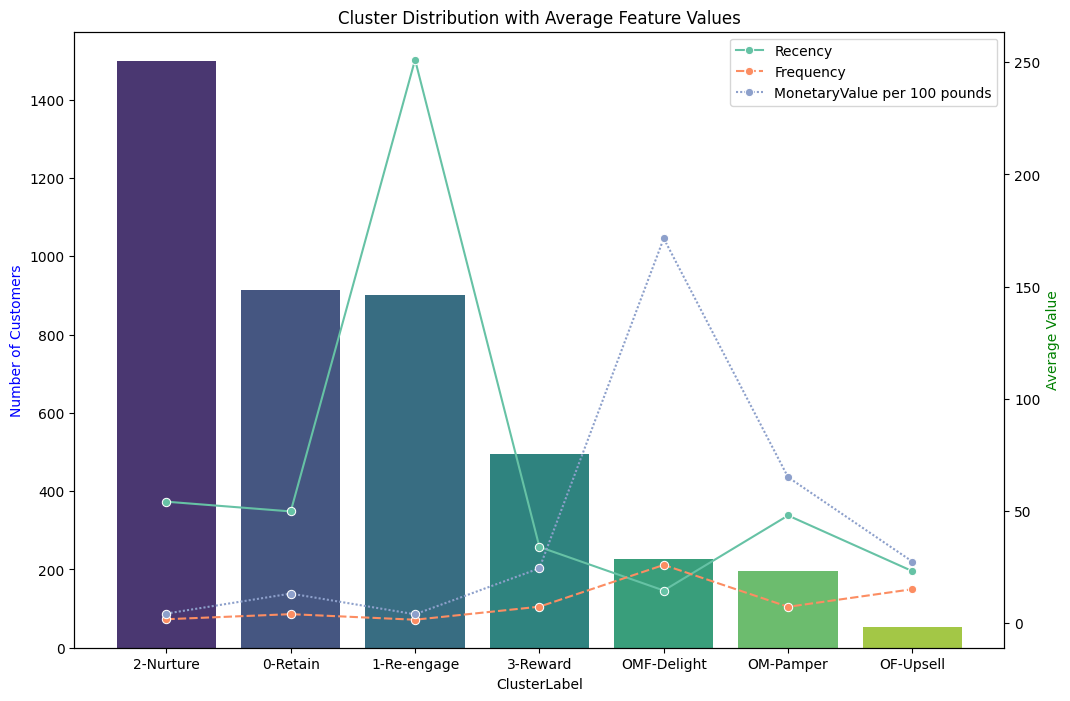

In [61]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

In [66]:
aggregated_df.to_csv("C:\\Users\\alexd\\Python Projects\\k_means/aggregated_data.csv", index=False, encoding='ISO-8859-1')
full_clustering_df.to_csv("C:\\Users\\alexd\\Python Projects\\k_means/full_clustering.csv", index=False, encoding='ISO-8859-1')
